In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from model import PredictModel

In [2]:
data_path = '../data/ds3.csv'
test_size = .1
epochs = 1000
batch_size = 32

In [3]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,4,4
1,2,12,16
2,3,15,31
3,4,9,40
4,5,28,68
5,6,29,97
6,7,8,105
7,8,7,112
8,9,4,116
9,10,8,124


In [4]:
X = df[['testing_date']].values
y = df[['cum_number_of_fault']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tenosr = torch.tensor(y_test, dtype=torch.float32)

In [6]:
model = PredictModel()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'{epoch + 1} / {epochs}, loss: {loss.item()}')



100 / 1000, loss: 0.001075872452929616
200 / 1000, loss: 0.0008984685409814119
300 / 1000, loss: 0.0006693447940051556
400 / 1000, loss: 0.0005997277330607176
500 / 1000, loss: 0.0005466495640575886
600 / 1000, loss: 0.0004820340545848012
700 / 1000, loss: 0.0004010525008197874
800 / 1000, loss: 0.004286421462893486
900 / 1000, loss: 0.00020333591965027153
1000 / 1000, loss: 0.0001302981545450166


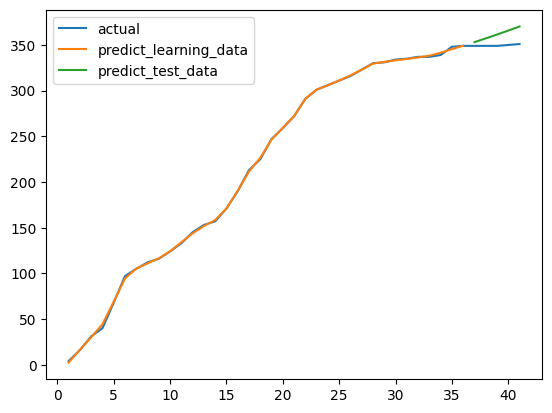

In [7]:
model.eval()

with torch.no_grad():
    y_pred_learning_tensor = model(X_train_tensor)
    y_pred_tensor = model(X_test_tensor)

plt.figure()
plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train_tensor.numpy()), scaler_y.inverse_transform(y_pred_learning_tensor.numpy()), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test_tensor.numpy()), scaler_y.inverse_transform(y_pred_tensor.numpy()), label='predict_test_data')
plt.legend()
plt.show()